## Margin



### **1. Tərif**
Bu düstur **margin**in bir başqa ifadəsidir:  
$$
M_i = a(x_i) \cdot y_i
$$  
burada:  
- $M_i$ — **margin** dəyəri  
- $a(x_i)$ — modelin verdiyi qərar funksiyası (decision function)  
- $y_i$ — həqiqi sinif dəyəri ($+1$ və ya $-1$)  

Margin **verilən nümunənin modelin qərarına nə qədər uyğun gəldiyini** göstərir. **Böyük margin** yaxşı ümumiləşdirməni təmin edir, **kiçik margin və ya mənfi margin** isə səhv təsnifat ehtimalını artırır.

---

### **2. Düsturun Addım-Addım İzahı**
Bu düstur əsasən **decision function** üzərində qurulub.

#### **1-ci addım: Decision Function**
Modelimiz verilmiş $x_i$ nümunəsi üçün aşağıdakı qərar funksiyasını hesablayır:
$$
a(x_i) = w^T x_i + b
$$
burada:
- $w$ — decision boundary-nin normal vektoru,
- $x_i$ — nümunənin atributları,
- $b$ — bias.

#### **2-ci addım: Marginin hesablanması**
Verilən nümunənin həqiqi sinif dəyəri $y_i$ ilə decision function-ın çıxışını vuraraq margin hesablanır:
$$
M_i = (w^T x_i + b) \cdot y_i
$$
Burada iki vəziyyət var:
- **Düz təsnif olunmuş nümunələr üçün:** $M_i > 0$
- **Səhv təsnif olunmuş nümunələr üçün:** $M_i < 0$

Bu, o deməkdir ki:
- **Pozitiv siniflər ($y_i = +1$) üçün** qərar funksiyası müsbət olmalıdır ($w^T x_i + b > 0$).
- **Negativ siniflər ($y_i = -1$) üçün** qərar funksiyası mənfi olmalıdır ($w^T x_i + b < 0$).
- **Əgər margin sıfır və ya mənfidirsə, model səhv təsnifat edib.**

---

### **3. Niyə Lazımdır?**
1. **Təsnifat modelinin gücünü ölçmək üçün:**  
   - **Böyük margin → daha yaxşı ümumiləşdirmə.**  
   - **Kiçik margin → model çox həssasdır və səhvlər edə bilər.**  
   
2. **Support Vector Machine (SVM) üçün vacibdir:**  
   - **Maksimum margin prinsipi** istifadə olunur:  
     $$
     \max \frac{1}{\|w\|}
     $$
   - Bu, modelin ümumiləşdirmə qabiliyyətini artırır.

3. **Neural Network və Perceptron-da istifadə olunur:**  
   - **Loss function-lar margin əsasında qurula bilər (hinge loss).**  
   - **Neural Network-lərdə adversarial nümunələri aşkar etmək üçün istifadə olunur.**  

---

### **4. Misal**
Tutaq ki, verilmiş $x_i$ nümunəsi üçün aşağıdakı dəyərlər var:
- $w = [1, -1]$,
- $x_i = [3, 2]$,
- $b = -1$,
- $y_i = +1$.

Hesablayaq:
$$
a(x_i) = (1 \cdot 3) + (-1 \cdot 2) + (-1) = 3 - 2 - 1 = 0
$$

Margin:
$$
M_i = 0 \cdot (+1) = 0
$$

Bu, o deməkdir ki, nümunə decision boundary-də yerləşir və margin minimaldır.

---

### **5. Nəticə**
- **Margin modelin ümumiləşdirmə qabiliyyətini ölçmək üçün vacib bir anlayışdır.**  
- **Düstur, modelin düzgün təsnif etmə gücünü göstərir.**  
- **SVM, Perceptron və Neural Network-lərdə margin anlayışı optimallaşdırma üçün istifadə olunur.**  

Sən bunu hansı modeldə tətbiq etmək istəyirsən? SVM, Perceptron, yoxsa başqa bir model?

## Simple Binary Classification məsələsinin həlli

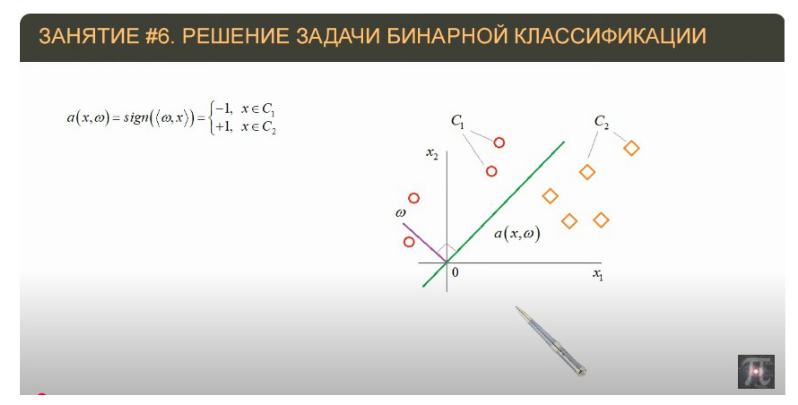

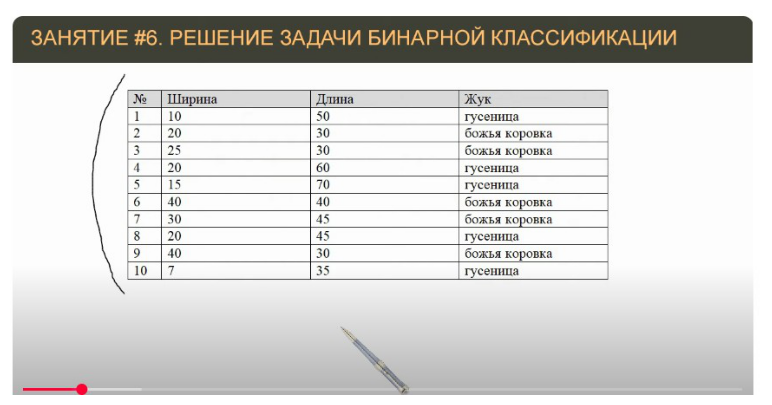

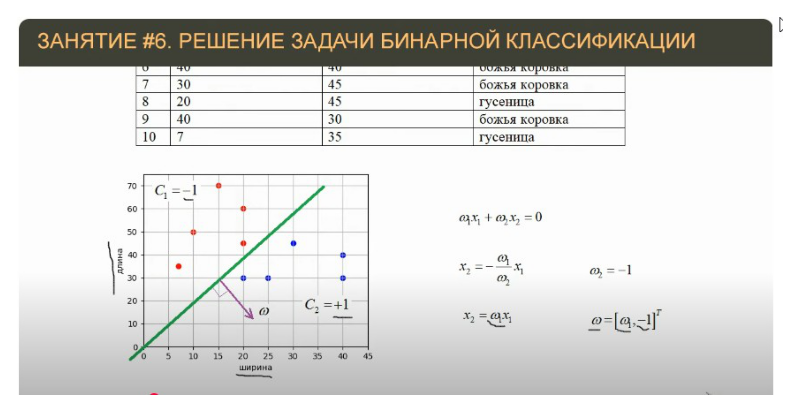

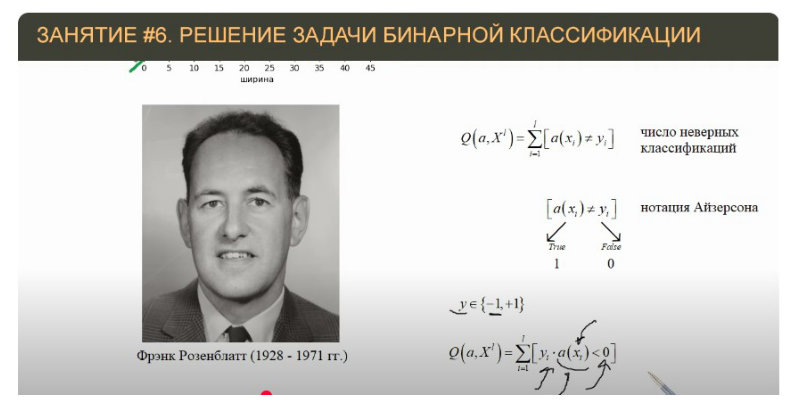

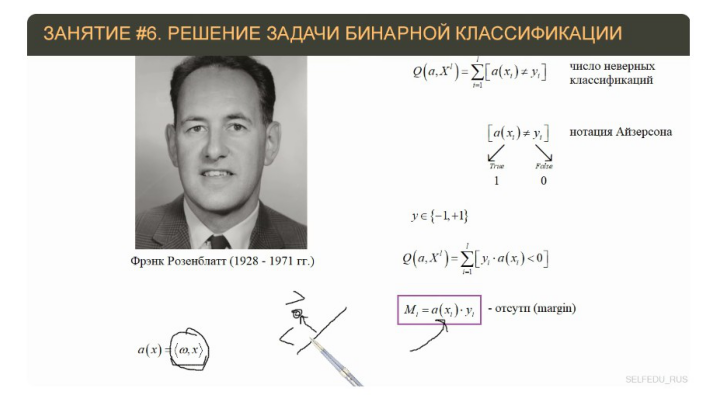

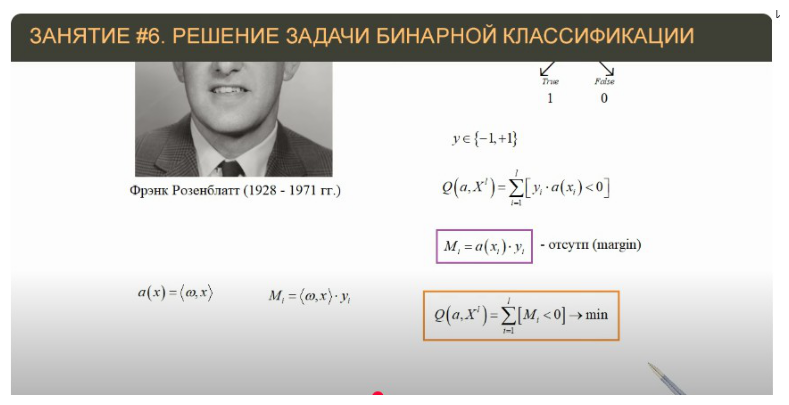

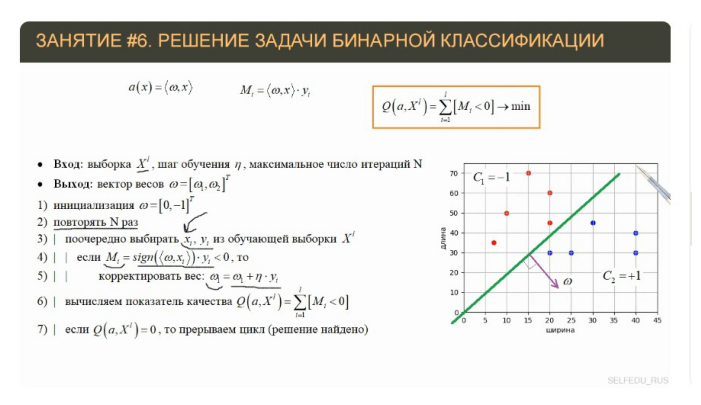

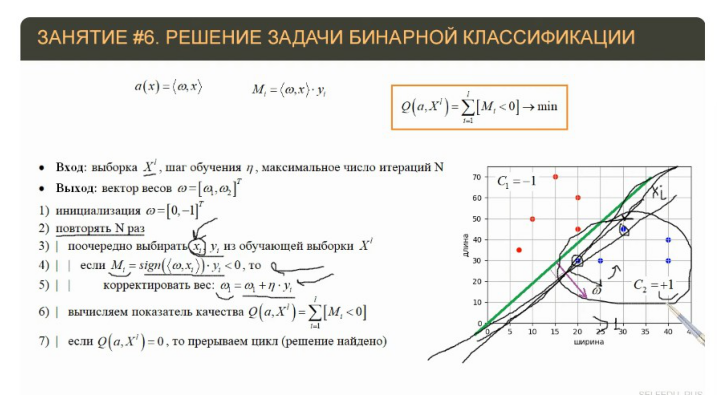

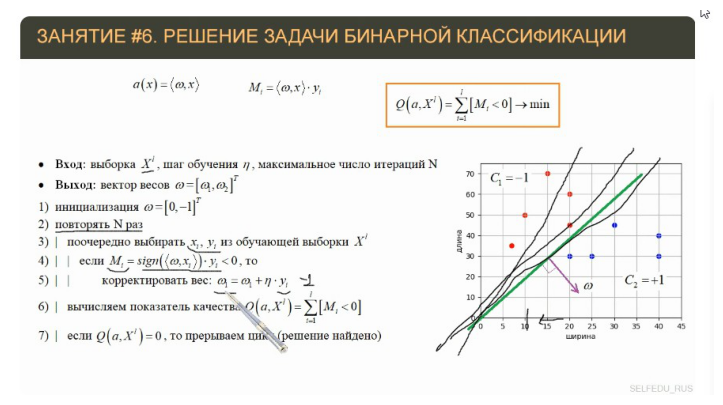

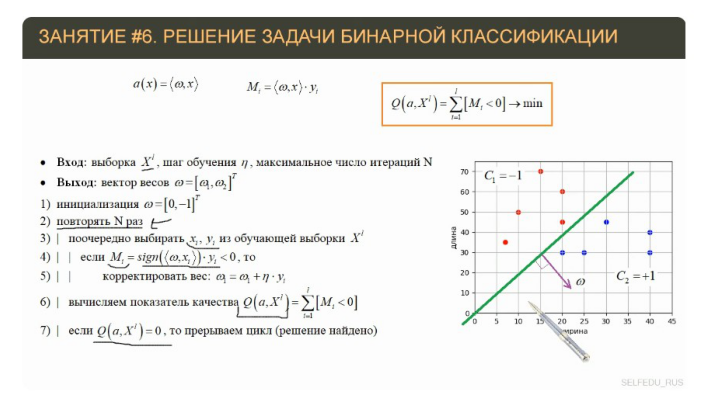

In [1]:
from PIL import Image

# Fayl yolunun əsas hissəsi
base_path = r'C:\Users\dell\Desktop\Selfedu\Pictures\Binary_Class_meselesi_'

# Şəkilləri saxlayacağımız siyahı
image_list = []

# 1-dən 5-ə qədər olan şəkilləri dövr ilə açırıq
for i in range(1, 11):  # 1-dən 5-ə qədər
    full_path = f'{base_path}{i}.jpg'  # Fayl yolunu dinamik olaraq yaradırıq
    img = Image.open(full_path)
    image_list.append(img)  # Şəkili siyahıya əlavə edirik

# Nəticə: images siyahısında bütün yüklənmiş şəkillər olacaq

import matplotlib.pyplot as plt

# Şəkilləri göstərin
for image in image_list:
    plt.figure(figsize=(25, 5))  # Şəkilin ölçüsü
    plt.imshow(image)
    plt.axis('off')  # Oxları gizlətmək üçün
    plt.show() 

## Python dilində izah

[1.6000000000000003, -1]


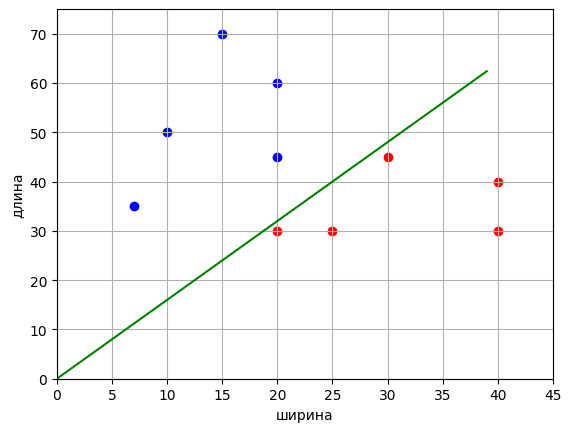

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Təlim məlumatlarını (x_train) və hədəf dəyərlərini (y_train) müəyyənləşdiririk.
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], 
                    [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# Təlim dəstinin ölçüsünü təyin edirik.
n_train = len(x_train)  

# Ağırlıq vektorunun başlanğıc qiymətləri (w0 = 0, w1 = -1).
w = [0, -1]  

# Qərar funksiyası: x * w-nin işarəsini qaytarır.
a = lambda x: np.sign(x[0] * w[0] + x[1] * w[1])  

# Maksimum iterasiya sayı.
N = 50  

# Ağırlıq yeniləməsi üçün addım dəyəri (öyrənmə sürəti).
L = 0.1  

# Sonuncu səhv təsnif edilən müşahidəyə kiçik bir düzəliş əlavə etmək üçün epsilon.
e = 0.1  

# Sonuncu səhv təsnif edilən müşahidənin indeksini saxlayırıq.
last_error_index = -1  

# Əsas Perceptron alqoritmi.
for n in range(N):  
    for i in range(n_train):  # Bütün nümunələr üzrə iterasiya edirik.
        if y_train[i] * a(x_train[i]) < 0:  # Səhv təsnifat varsa,
            w[0] = w[0] + L * y_train[i]  # Ağırlığı yeniləyirik.
            last_error_index = i  

    # Ümumi səhv təsnif edilən nümunələrin sayını hesablayırıq.
    Q = sum([1 for i in range(n_train) if y_train[i] * a(x_train[i]) < 0])
    
    # Əgər səhv təsnifat qalmayıbsa, dövrü dayandırırıq.
    if Q == 0:
        break  

# Sonuncu səhv təsnif edilən müşahidə varsa, w[0]-ı kiçik bir düzəliş edirik.
if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]  

# Ağırlıq vektorunu çap edirik.
print(w)

# Sərhəd xəttinin x koordinatlarını təyin edirik.
line_x = list(range(max(x_train[:, 0])))

# Sərhəd xəttinin y koordinatlarını hesablamaq üçün tənlik: y = w0 * x
line_y = [w[0] * x for x in line_x]

# Müsbət sinifə aid olan nümunələri seçirik.
x_0 = x_train[y_train == 1]

# Mənfi sinifə aid olan nümunələri seçirik.
x_1 = x_train[y_train == -1]

# Müsbət sinifdəki nöqtələri (qırmızı) çəkmək.
plt.scatter(x_0[:, 0], x_0[:, 1], color='red')

# Mənfi sinifdəki nöqtələri (mavi) çəkmək.
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')

# Sərhəd xəttini (yaşıl) çəkmək.
plt.plot(line_x, line_y, color='green')

# Qrafikin x və y limitlərini təyin edirik.
plt.xlim([0, 45])
plt.ylim([0, 75])

# OX və OY oxlarını adlandırırıq.
plt.ylabel("длина")  # Uzunluq
plt.xlabel("ширина")  # En

# Şəbəkə (grid) xətləri əlavə edirik.
plt.grid(True)

# Qrafiki göstəririk.
plt.show()